# 1083 Albumin Initial ML

### By: Ian Weimer

## Imports

In [82]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
import math
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from statsmodels.regression.linear_model import OLS
from sklearn.model_selection import cross_val_score
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc, confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve
import warnings
from sklearn.compose import make_column_transformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import balanced_accuracy_score
pd.set_option('display.max_columns', None)

## Load Albumin Data From Pre-processing and Exploratory Analysis

In [83]:
df = pd.read_csv('/Users/ianweimer/1083-albumin-data-exploration/ML/tables/albumin_cleaned_7.csv')

In [84]:
# drop insignificant vars

#df.drop(columns = ['bed_size', 'Cirrhosis', 'tenant'], inplace=True)

In [85]:
df.head()

sex  ICU  mass_transfusion  total_transfusions  anemia_status  CCI  \
0    1    1                 0                   1            2.0    6   
1    1    0                 0                   0            3.0    2   
2    1    0                 0                   0            2.0    3   
3    1    0                 0                   1            2.0    4   
4    1    0                 0                   0            0.0    4   

   albumin_24hrs  5_percent_albumin  25_percent_albumin  unknown_albumin_type  \
0            0.0                0.0                 0.0                   1.0   
1            0.0                0.0                 1.0                   0.0   
2            0.0                0.0                 1.0                   0.0   
3            0.0                0.0                 1.0                   0.0   
4            0.0                0.0                 1.0                   0.0   

   MELD  qSOFA  Cirrhosis  beta_blocker  hemorrhagic  alb_diff  \
0  11.0      1          0             1            0       0.3   
1   9.0      0          1             0            0       0.3   
2  18.0      3          0             1            0       2.0   
3  20.0      0          0             0            0      -0.6   
4  17.0      0          0             1            0      -0.9   

   30_day_mortality  30_day_readmission  days_until_readmission  LOS_days  \
0                 0                   0                       2         2   
1                 0                   0                       2         1   
2                 0                   0                       2         2   
3                 0                   0                       2         1   
4                 0                   1                       1         2   

   total_ICU_LOS_days  
0                   2  
1                   0  
2                   0  
3                   0  
4                   0

In [86]:
df.shape

(19993, 21)

In [87]:
df.drop(columns=['sex'], inplace=True)

In [89]:
df.drop(columns=['30_day_readmission', '30_day_mortality', 'days_until_readmission', 'total_ICU_LOS_days'], inplace=True)

In [90]:
df.describe()

ICU  mass_transfusion  total_transfusions  anemia_status  \
count  19993.000000      19993.000000        19993.000000   19993.000000   
mean       0.208973          0.025059            0.757165       1.780773   
std        0.406585          0.156308            1.213339       1.081977   
min        0.000000          0.000000            0.000000       0.000000   
25%        0.000000          0.000000            0.000000       1.000000   
50%        0.000000          0.000000            0.000000       2.000000   
75%        0.000000          0.000000            1.000000       3.000000   
max        1.000000          1.000000            7.000000       3.000000   

                CCI  albumin_24hrs  5_percent_albumin  25_percent_albumin  \
count  19993.000000   19993.000000       19993.000000        19993.000000   
mean       3.746811       0.050918           0.041915            0.069024   
std        2.649892       0.219835           0.200399            0.253502   
min        0.000000       0.000000           0.000000            0.000000   
25%        2.000000       0.000000           0.000000            0.000000   
50%        3.000000       0.000000           0.000000            0.000000   
75%        5.000000       0.000000           0.000000            0.000000   
max       19.000000       1.000000           1.000000            1.000000   

       unknown_albumin_type          MELD         qSOFA     Cirrhosis  \
count          19993.000000  19993.000000  19993.000000  19993.000000   
mean               0.078127     12.347210      0.425949      0.254389   
std                0.268379      6.661165      0.643892      0.435528   
min                0.000000      6.000000      0.000000      0.000000   
25%                0.000000      8.000000      0.000000      0.000000   
50%                0.000000     10.000000      0.000000      0.000000   
75%                0.000000     15.000000      1.000000      1.000000   
max                1.000000     40.000000      3.000000      1.000000   

       beta_blocker   hemorrhagic      alb_diff      LOS_days  
count  19993.000000  19993.000000  19993.000000  19993.000000  
mean       0.357325      0.058470     -0.364415      0.727955  
std        0.479224      0.234637      0.497976      0.801202  
min        0.000000      0.000000     -3.200000      0.000000  
25%        0.000000      0.000000     -0.600000      0.000000  
50%        0.000000      0.000000     -0.300000      1.000000  
75%        1.000000      0.000000     -0.100000      1.000000  
max        1.000000      1.000000      3.100000      2.000000

In [129]:
df.LOS_days.value_counts()

0    9876
1    5680
2    4437
Name: LOS_days, dtype: int64

## Modeling

In [91]:
# establish target feature, LOS_days, as y feature
y = df['LOS_days']
# drop target feature from features dataframe
X = df.drop(columns = ['LOS_days'], axis = 1)
# save dataframe column titles to list for reassigning after min max scale 
cols = X.columns

In [92]:
cols

Index(['ICU', 'mass_transfusion', 'total_transfusions', 'anemia_status', 'CCI',
       'albumin_24hrs', '5_percent_albumin', '25_percent_albumin',
       'unknown_albumin_type', 'MELD', 'qSOFA', 'Cirrhosis', 'beta_blocker',
       'hemorrhagic', 'alb_diff'],
      dtype='object')

## Standardize Data

In [93]:
#cols = X.columns

#instantiate min-max scaling object
#mm = MinMaxScaler()
# fit and transform feature dataframe
#X = pd.DataFrame(mm.fit_transform(X))
# reassign column names so new dataframe has corresponding names
#X.columns = cols

In [94]:
X.head()

ICU  mass_transfusion  total_transfusions  anemia_status  CCI  \
0    1                 0                   1            2.0    6   
1    0                 0                   0            3.0    2   
2    0                 0                   0            2.0    3   
3    0                 0                   1            2.0    4   
4    0                 0                   0            0.0    4   

   albumin_24hrs  5_percent_albumin  25_percent_albumin  unknown_albumin_type  \
0            0.0                0.0                 0.0                   1.0   
1            0.0                0.0                 1.0                   0.0   
2            0.0                0.0                 1.0                   0.0   
3            0.0                0.0                 1.0                   0.0   
4            0.0                0.0                 1.0                   0.0   

   MELD  qSOFA  Cirrhosis  beta_blocker  hemorrhagic  alb_diff  
0  11.0      1          0             1            0       0.3  
1   9.0      0          1             0            0       0.3  
2  18.0      3          0             1            0       2.0  
3  20.0      0          0             0            0      -0.6  
4  17.0      0          0             1            0      -0.9

## Train Test Split

In [95]:
# train test split from target feature series and the predicting feature dataframe (set test size to 20% of data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 33)

## Multinomial Logistic Regression

In [96]:
# instantiate a Logistic Regression model without an intercept, 'liblinear' solver method
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# fit the model to X and y training sets
logreg.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(multi_class='multinomial')

Feature: ICU Score: -0.21560
Feature: mass_transfusion Score: -0.32399
Feature: total_transfusions Score: -0.00328
Feature: anemia_status Score: 0.09108
Feature: CCI Score: -0.10097
Feature: albumin_24hrs Score: 0.52968
Feature: 5_percent_albumin Score: -0.67997
Feature: 25_percent_albumin Score: -0.96159
Feature: unknown_albumin_type Score: -1.33945
Feature: MELD Score: -0.02062
Feature: qSOFA Score: -0.26666
Feature: Cirrhosis Score: 0.37003
Feature: beta_blocker Score: -0.22198
Feature: hemorrhagic Score: -0.36526
Feature: alb_diff Score: 0.35819


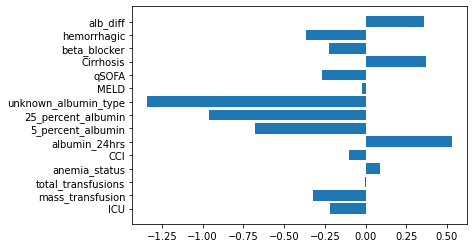

In [97]:
# general quick feature importance
# get coefficients for importance
# coefficients represent the log odds that an observation is in the
# target class, given the values of its X variables

importance = logreg.coef_[0]
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

                      Importance
albumin_24hrs           1.698385
Cirrhosis               1.447780
alb_diff                1.430734
anemia_status           1.095351
total_transfusions      0.996725
MELD                    0.979593
CCI                     0.903958
ICU                     0.806057
beta_blocker            0.800931
qSOFA                   0.765935
mass_transfusion        0.723256
hemorrhagic             0.694013
5_percent_albumin       0.506631
25_percent_albumin      0.382286
unknown_albumin_type    0.261990


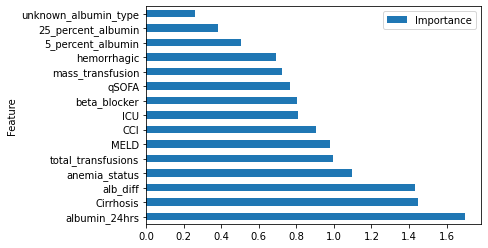

In [98]:
# convert log odds into regular odds with exponentiation
# np.exp()
# and list values, visualize in bar plot

odds = np.exp(logreg.coef_[0])
feature_importance = \
            pd.DataFrame(odds, 
             X.columns, 
             columns=['Importance'])\
            .sort_values(by='Importance', ascending=False)
        
ax = feature_importance.plot.barh(xlabel='Feature', ylabel='Importance')
print(feature_importance)
plt.show()

In [99]:
# Generate model prediction data for train and test sets
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [100]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[7243  416  272]
 [3457  504  567]
 [1696  351 1488]]


In [101]:
# model metrics for training set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.58      0.91      0.71      7931
           1       0.40      0.11      0.17      4528
           2       0.64      0.42      0.51      3535

    accuracy                           0.58     15994
   macro avg       0.54      0.48      0.46     15994
weighted avg       0.54      0.58      0.51     15994



In [102]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[1793   84   68]
 [ 853  146  153]
 [ 423   92  387]]


In [103]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.58      0.92      0.72      1945
           1       0.45      0.13      0.20      1152
           2       0.64      0.43      0.51       902

    accuracy                           0.58      3999
   macro avg       0.56      0.49      0.48      3999
weighted avg       0.56      0.58      0.52      3999



## Decision Tree with all (16) independent vars

In [104]:
# instantiate a decision tree model
# max_depth limits depth of tree, helps prevent overfitting training data
dt = tree.DecisionTreeClassifier(max_depth=5)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

Feature: ICU Score: 0.00000
Feature: mass_transfusion Score: 0.00334
Feature: total_transfusions Score: 0.00000
Feature: anemia_status Score: 0.01199
Feature: CCI Score: 0.13594
Feature: albumin_24hrs Score: 0.05527
Feature: 5_percent_albumin Score: 0.00524
Feature: 25_percent_albumin Score: 0.09958
Feature: unknown_albumin_type Score: 0.41898
Feature: MELD Score: 0.01157
Feature: qSOFA Score: 0.07287
Feature: Cirrhosis Score: 0.01436
Feature: beta_blocker Score: 0.01797
Feature: hemorrhagic Score: 0.00000
Feature: alb_diff Score: 0.15290


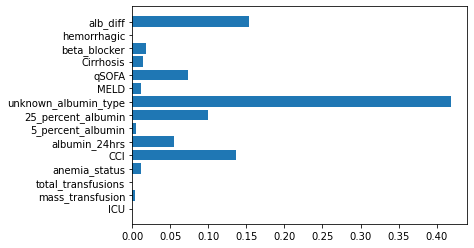

In [105]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [106]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [107]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[7537  117  277]
 [3823  182  523]
 [1997  150 1388]]


In [108]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.56      0.95      0.71      7931
           1       0.41      0.04      0.07      4528
           2       0.63      0.39      0.49      3535

    accuracy                           0.57     15994
   macro avg       0.53      0.46      0.42     15994
weighted avg       0.53      0.57      0.48     15994



In [109]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[1837   32   76]
 [ 963   29  160]
 [ 529   36  337]]


In [110]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.55      0.94      0.70      1945
           1       0.30      0.03      0.05      1152
           2       0.59      0.37      0.46       902

    accuracy                           0.55      3999
   macro avg       0.48      0.45      0.40      3999
weighted avg       0.49      0.55      0.46      3999



In [125]:
X_train

ICU  mass_transfusion  total_transfusions  anemia_status  CCI  \
13791    1                 0                   0            2.0    2   
14089    1                 0                   0            3.0    0   
3173     0                 0                   0            1.0    1   
19772    1                 1                   2            2.0    3   
4116     0                 0                   0            0.0    1   

       albumin_24hrs  5_percent_albumin  25_percent_albumin  \
13791            0.0                0.0                 0.0   
14089            0.0                0.0                 0.0   
3173             0.0                0.0                 0.0   
19772            0.0                0.0                 0.0   
4116             0.0                0.0                 0.0   

       unknown_albumin_type  MELD  qSOFA  Cirrhosis  beta_blocker  \
13791                   0.0   9.0      0          0             1   
14089                   0.0   7.0      0          0             0   
3173                    0.0   7.0      0          0             0   
19772                   0.0  10.0      1          0             1   
4116                    0.0   6.0      0          0             0   

       hemorrhagic  alb_diff  
13791            0      -0.7  
14089            0      -0.5  
3173             0      -0.9  
19772            0      -1.5  
4116             0      -0.7

In [128]:
y_train.value_counts()

0    7931
1    4528
2    3535
Name: LOS_days, dtype: int64

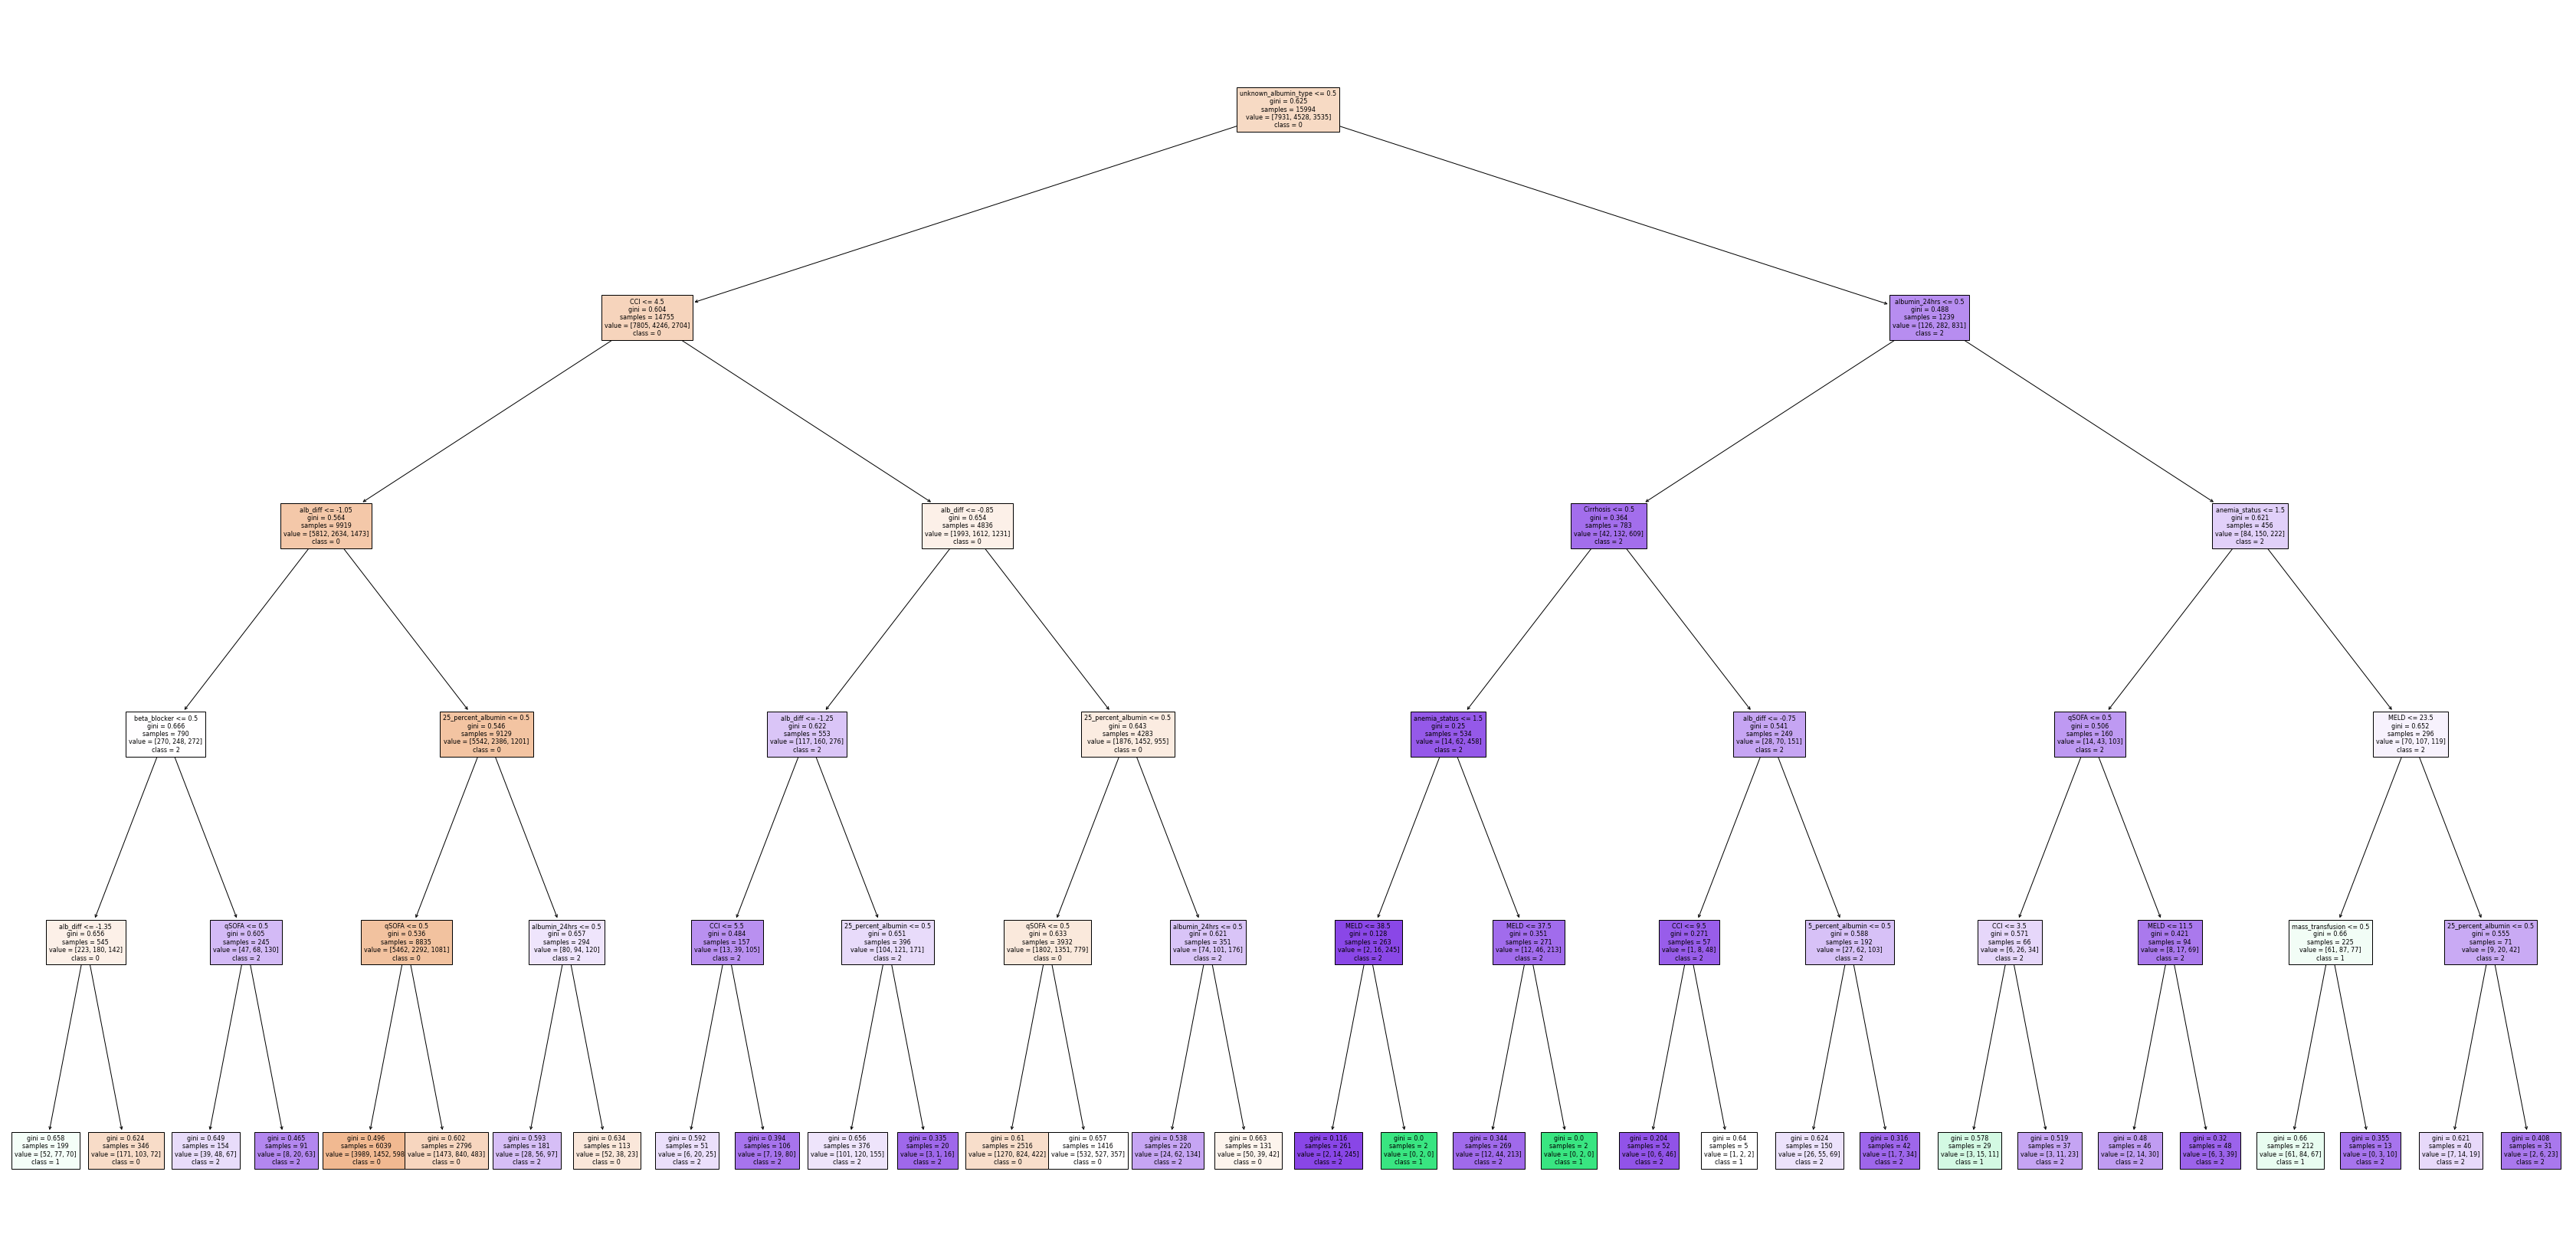

In [111]:
feature_names = df.columns.tolist()
class_names = ['0', '1', '2']

fig = plt.figure(figsize=(60,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

## Decision Tree with 4 selected vars

In [112]:
# instantiate a decision tree model
# max_depth limits depth of tree, helps prevent overfitting training data
dt = tree.DecisionTreeClassifier(max_depth=4)
# fit the model to X and y training sets
X_train1 = X_train[['Cirrhosis', 'qSOFA', 'MELD', 'albumin_24hrs']]
X_test1 = X_test[['Cirrhosis', 'qSOFA', 'MELD', 'albumin_24hrs']]
dt.fit(X_train1, y_train)

DecisionTreeClassifier(max_depth=4)

Feature: Cirrhosis Score: 0.04160
Feature: qSOFA Score: 0.45273
Feature: MELD Score: 0.40876
Feature: albumin_24hrs Score: 0.09691


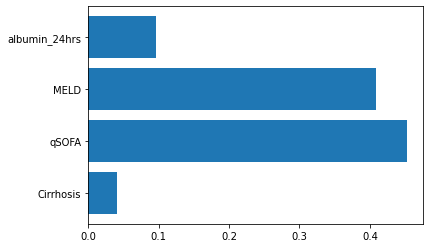

In [113]:
cols = X_train1.columns
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [114]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train1)
y_hat_test = dt.predict(X_test1)

In [115]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[7422   83  426]
 [3908  160  460]
 [2856  124  555]]


In [116]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.52      0.94      0.67      7931
           1       0.44      0.04      0.07      4528
           2       0.39      0.16      0.22      3535

    accuracy                           0.51     15994
   macro avg       0.45      0.38      0.32     15994
weighted avg       0.47      0.51      0.40     15994



In [117]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[1820   27   98]
 [ 972   32  148]
 [ 713   42  147]]


In [118]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.52      0.94      0.67      1945
           1       0.32      0.03      0.05      1152
           2       0.37      0.16      0.23       902

    accuracy                           0.50      3999
   macro avg       0.40      0.38      0.32      3999
weighted avg       0.43      0.50      0.39      3999



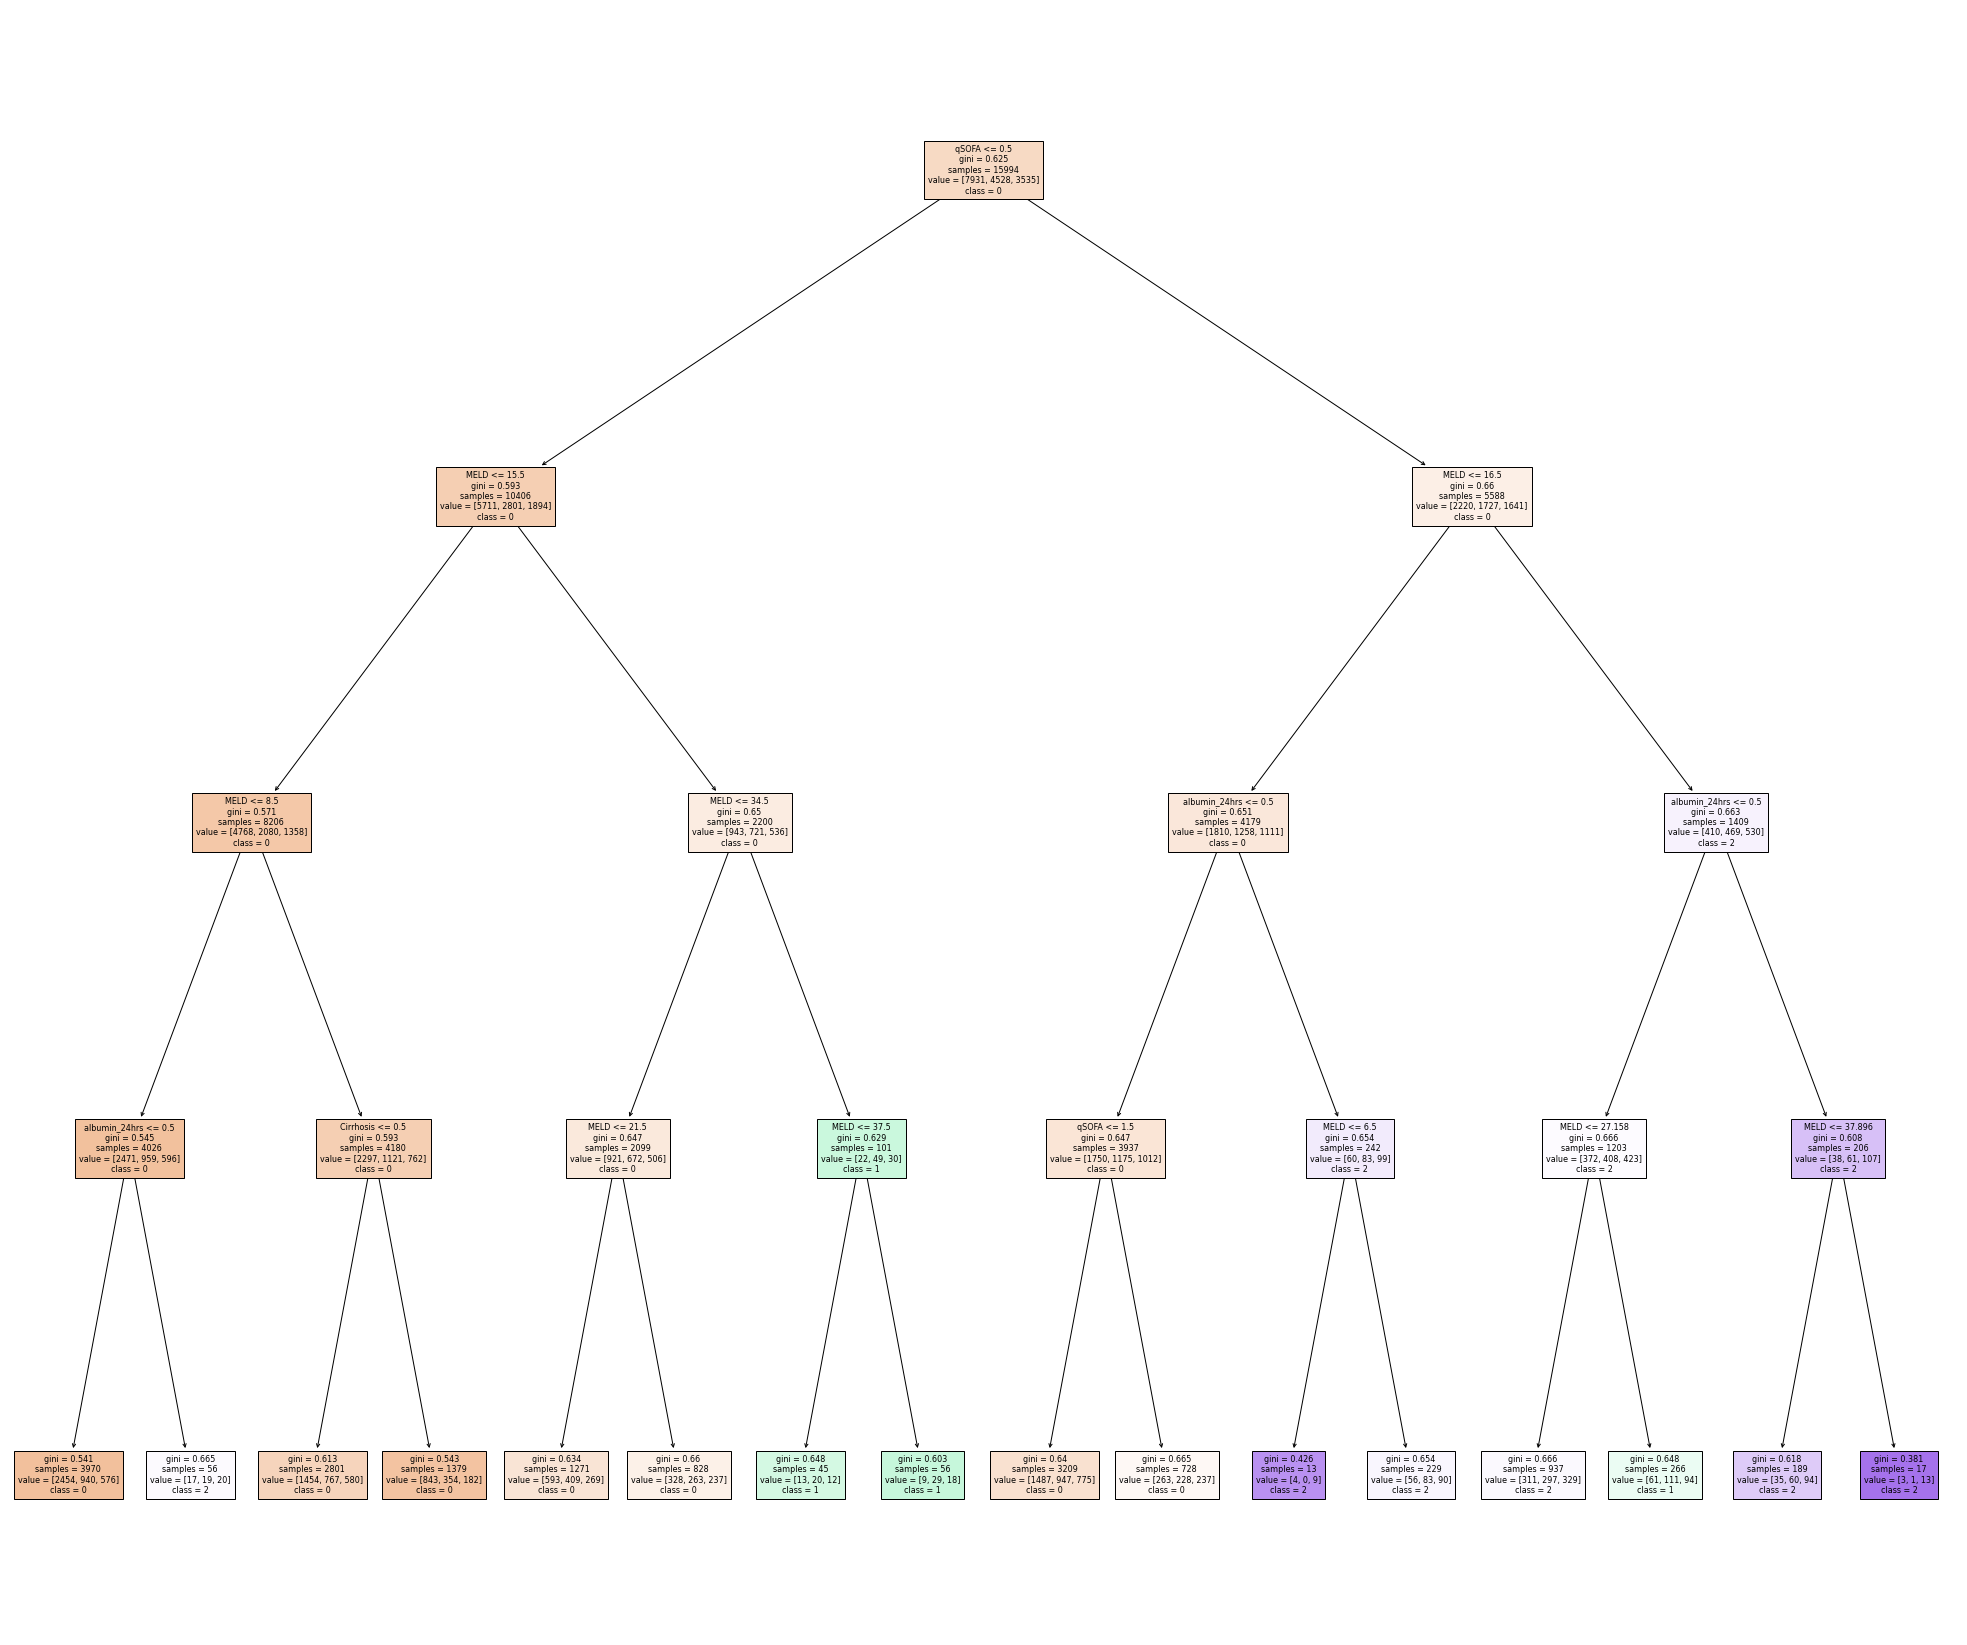

In [119]:
feature_names = X_train1.columns.tolist()
class_names = ['0', '1', '2']

fig = plt.figure(figsize=(35,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)